# 2D Crack propagation in a bended beam

 - @todo: Plot the residual value
 - @todo: State dependencies - recalculate upon material parameter change

\begin{align}
\sigma_\mathrm{F} = E w / L_\mathrm{eff}
\end{align}

In [1]:
import sympy as sp
xi = sp.Symbol(r'\xi')
G_f0 = sp.Symbol(r'G_{f0}')
a = 1.038
b = 0.245
G_f = (1 + (a/(1+b/xi)) - (1 + a + b)/(1 + b) * xi**8) #G_f0 * 
get_G_F = sp.lambdify((xi,G_f0), G_f, 'numpy') 
get_G_F

<function _lambdifygenerated(Dummy_22, Dummy_23)>

<lambdifygenerated-1>:2: RuntimeWarning: divide by zero encountered in true_divide
  return (-1.83373493975904*Dummy_22**8 + 1 + 1.038/(1 + 0.245/Dummy_22))
No handles with labels found to put in legend.


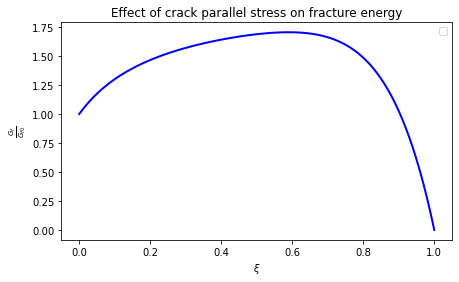

In [2]:
import matplotlib.pylab as plt
import numpy as np
_, (ax1) = plt.subplots(1, 1, figsize=(7,4))
xi = np.linspace(0,1,100)
G_f0 = 86.7
G_f = get_G_F(xi, G_f0)
ax1.plot(xi, G_f , color = 'blue', lw= 2);
ax1.set_xlabel(r'$\xi$'); ax1.set_ylabel(r'$\frac{G_f}{G_{f0}}$');
ax1.set_title(r'Effect of crack parallel stress on fracture energy')
ax1.legend()
plt.savefig("D:\Shear zones\Python plots\Bazanttest.pdf")

In [3]:
# %matplotlib widget
# import bmcs_utils.api as bu
# from bmcs_shear.shear_crack.crack_propagation import CrackPropagation
# ce = CrackPropagation(n_seg=5)
# ce.sz_bd.cmm.trait_set(tau_1 = 4, s_1 = 0.2, tau_2 = 3, tau_3 = 2, s_2 = 1.4, s_3 = 5)
# ce.sz_bd.cmm.trait_set(f_c = 33.3, f_t = 0.3 * 33.3 **(2/3), d_a = 16)
# ce.sz_bd.Rectangle = True
# ce.sz_bd.trait_set(H=600, B=250, L=3870)
# ce.sz_cp.trait_set(x_00=ce.sz_bd.L * 0.5, n_m = 15)
# ce.sz_cp.sz_ctr.trait_set(ell = 2)
# ce.sz_bd.cross_section_layout.reinforcement.z_j[0] = 44
# ce.sz_bd.cross_section_layout.reinforcement.A_j[0] = 615.44 #2 no 28
# ce.sz_bd.cross_section_layout.reinforcement.E_j[0] = 210000 / 100

In [4]:
%matplotlib widget
import numpy as np
import bmcs_utils.api as bu
from bmcs_shear.shear_crack.crack_propagation import CrackPropagation
ce = CrackPropagation(n_seg=140)
#ce.sz_bd.cmm.trait_set(tau_1 = 4, s_1 = 0.2, tau_2 = 3, tau_3 = 2, s_2 = 1.4, s_3 = 5)
#ce.sz_bd.cmm.trait_set(f_c = 33.3, f_t = 0.3 * 33.3 **(2/3), d_a = 16)
ce.sz_bd.Rectangle = True
ce.sz_bd.trait_set(H=600, B=250, L=3870)
ce.sz_cp.trait_set(x_00=ce.sz_bd.L * 0.1, n_m = 4)
ce.sz_cp.sz_ctr.L_fps = 40
ce.sz_cp.sz_ctr.trait_set(ell = 2)
ce.sz_bd.cross_section_layout.reinforcement[0].trait_set(z=44, A=615.44, E=210000)

#F_La, F_Na, F_m, Q_reduce, c_p = ce.analyze() 
#print(F_La, F_Na, c_p)

In [5]:
bu.InteractiveWindow([ce, ce.sz_bd, ce.sz_bd.cross_section_layout, 
                      ce.sz_stress_profile, 
                      ce.sz_bd.cmm, ce.sz_bd.smm, ce.sz_cp, ce.sz_cp.sz_ctr]).interact()

<lambdifygenerated-25>:2: RuntimeWarning: invalid value encountered in sqrt
  return (select([less_equal(w, 0),True], [0,0.25*f_c*s*(-sqrt(2)*sqrt(w/d_a) + 1)*((2.44 - 39.04/f_c)*abs(s/w)**3 + 9.8/f_c)/(w*(s**4*(2.44 - 39.04/f_c)/w**4 + 1))], default=nan))


In [6]:
import numpy as np
crack_position = 0.5 * ce.sz_bd.L
ce.reset()
ce.sz_cp.trait_set(x_00=crack_position)
ce.sz_cp.sz_ctr.L_fps = 80
ce.run()
F_beam = ce.F_beam
F_max_ = np.max(F_beam)
F_max_i_ = np.argmax(F_beam)
F_max_i_int = np.array(F_max_i_)
F_Na_ = ce.F_Na[F_max_i_int]
F_s_ = ce.F_s[F_max_i_int]
w = ce.w_steel[F_max_i_int]

<lambdifygenerated-25>:2: RuntimeWarning: invalid value encountered in sqrt
  return (select([less_equal(w, 0),True], [0,0.25*f_c*s*(-sqrt(2)*sqrt(w/d_a) + 1)*((2.44 - 39.04/f_c)*abs(s/w)**3 + 9.8/f_c)/(w*(s**4*(2.44 - 39.04/f_c)/w**4 + 1))], default=nan))


In [7]:
#w, F_s_, F_max_

In [8]:
import numpy as np
crack_position = 0.1 * ce.sz_bd.L
ce.reset()
ce.sz_cp.trait_set(x_00=crack_position)
ce.sz_cp.sz_ctr.L_fps = 80
ce.run()
F_beam = ce.F_beam
F_max_ = np.max(F_beam)
F_max_i_ = np.argmax(F_beam)
F_max_i_int = np.array(F_max_i_)
F_Na_ = ce.F_Na[F_max_i_int]
F_s_ = ce.F_s[F_max_i_int]
slip_ = ce.slip[F_max_i_int]
w_ = ce.w[F_max_i_int][0]
steel_slip_ = ce.s_steel[F_max_i_int]
w_steel_ = ce.w_steel[F_max_i_int]
shear_stress_ = ce.shear_agg[F_max_i_int]
F_a_ = ce.F_a[F_max_i_int][1]
F_agg_ = F_a_ - F_Na_
# shear_stress_, slip_

In [9]:
import matplotlib.pylab as plt
_, (ax1) = plt.subplots(1, 1, figsize=(8,4))
s = np.linspace(0,1,100)
V_df = ce.sz_bd.smm.get_V_df(s)
ax1.plot(s, V_df , color = 'blue', lw= 2, label = '$V_{da}$');
ax1.set_xlabel(r'$slip\,(mm)}$'); ax1.set_ylabel(r'$V (N)$');
ax1.set_title(r'Dowel Force Contribution')
ax1.legend()
plt.savefig("D:\Shear zones\Python plots\Dowel_force.pdf")

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

In [10]:
# import numpy as np
# ce.sz_stress_profile.u_La
# idx = np.argmax(ce.F_beam)
# #v_n = ce.v_n
# #v_n[idx]
# #ce.F_Na[idx]
# idx

In [11]:
# ce.sz_stress_profile.u_Na

In [12]:
ce.reset()
ini_crck_point = ce.sz_cp.trait_set(x_00= 0.1 * ce.sz_bd.L)
ce.run()
H_s = []
F_beam = ce.F_beam
F_max_ = np.max(F_beam)
F_max_i_ = np.argmax(F_beam)
F_max_i_int = np.array(F_max_i_)
x_tip_1k_ = ce.x_tip_1k[F_max_i_int]
for i in range(len(F_beam)):
    if ce.x_tip_1k[i] <= x_tip_1k_:
        H_s_ = ce.sz_bd.H - ce.x_tip_1k[i]
        #shear_agg = ce.shear_agg[i]
        H_s.append(H_s_)
    else:
        break
print(H_s)
    #print(shear_agg)
# H_s = []
# F_beam = ce.F_beam
# F_max_ = np.max(F_beam)
# for i in range(len(F_beam)):
#     if F_beam[i] == F_max_:
#         H_s = ce.H_s
#         #H_s.append(H_s)
#     else:
#         break
#     print(H_s)

<lambdifygenerated-25>:2: RuntimeWarning: invalid value encountered in sqrt
  return (select([less_equal(w, 0),True], [0,0.25*f_c*s*(-sqrt(2)*sqrt(w/d_a) + 1)*((2.44 - 39.04/f_c)*abs(s/w)**3 + 9.8/f_c)/(w*(s**4*(2.44 - 39.04/f_c)/w**4 + 1))], default=nan))


[600.0, array([598.00000282]), array([596.00000564]), array([594.00000847]), array([592.0000123]), array([590.00001613]), array([588.0000205]), array([586.00002492]), array([584.00021999]), array([582.00041506]), array([580.00060744]), array([578.00098679]), array([576.0014422]), array([574.00198117]), array([572.00252015]), array([570.00313883]), array([568.00397474]), array([566.00492503]), array([564.00587532]), array([562.00687214]), array([560.00786896]), array([558.00935621]), array([556.01099725]), array([554.01279985]), array([552.01477187]), array([550.0167537]), array([548.01873552]), array([546.021264]), array([544.02399239]), array([542.02692883]), array([540.03008011]), array([538.03345441]), array([536.03682871]), array([534.04067015]), array([532.04475488]), array([530.04908959]), array([528.05374631]), array([526.05859988]), array([524.06372284]), array([522.0691206]), array([520.07479861]), array([518.08076246]), array([516.0870161]), array([514.09356442]), array([512.

In [13]:
# ce.reset()
# ini_crck_point = ce.sz_cp.trait_set(x_00= 0.1 * ce.sz_bd.L)
# ce.run()
# F_beam = ce.F_beam
# F_max_ = np.max(F_beam)
# for i in range(len(F_beam)):
#     if F_beam[i] < F_max_:
#         pass
#     elif F_beam[i] == F_max_:
#         slip = ce.slip[i]
#         #H_s = ce.H_s
#         shear_agg = ce.shear_agg[i]
#         print('shear agg', shear_agg)
#         print('slip', slip)
#         #print(shear_agg)
#         #print(H_s)

In [14]:
# ce.reset()
# ini_crck_point = ce.sz_cp.trait_set(x_00= 0.9 * ce.sz_bd.L)
# ce.run()
# F_beam = ce.F_beam
# F_max_ = np.max(F_beam)
# F_max_idx = np.argmax(F_beam)
# F_Na_ = ce.F_Na[F_max_idx]
# s_s = ce.s_steel[:F_max_idx]
# V_da = ce.F_Na[:F_max_idx]
# slip = ce.slip
# shear_agg = ce.shear_agg

In [15]:
# import matplotlib.pylab as plt
# _, (ax1, ax2) = plt.subplots(1, 2, figsize=(11,4))
# ax1.plot(s_s, V_da , color = 'blue', lw= 2, label = '$V_{da}$');
# ax1.set_xlabel(r'$slip\,(mm)}$'); ax1.set_ylabel(r'$V (N)$');
# ax1.set_title(r'Dowel Force Contribution')
# ax1.legend()
# ax2.plot(slip, shear_agg , color = 'red', lw= 2, label = r'$\tau_{agg}$');
# ax2.set_xlabel(r'$slip\,(mm)}$'); ax2.set_ylabel(r'$\tau_{agg}$');
# ax2.set_title(r'Aggregate Force Contribution at Ultimate state')
# ax2.legend()
# #plt.savefig("D:\Shear zones\Python plots\dowel_agg_09.pdf")

In [16]:
# import matplotlib.pylab as plt
# _, (ax1, ax2) = plt.subplots(1, 2, figsize=(11,4))
# ax1.plot(ce.sz_stress_profile.u_Lb[:,1], ce.sz_stress_profile.S_Lb[:,1] , color = 'blue', lw= 2, label = '$F_{agg}$');
# ax2.plot(s_s, ce.sz_stress_profile.S_Lb[:,0] , color = 'blue', lw= 2, label = '$F_{agg}$');

In [17]:
# import numpy as np
# np.max(ce.F_beam)# + ce.crack_tip_shear_stress.Q + ce.crack_tip_shear_stress.Q_reduced

In [18]:
#ce.sz_stress_profile.F_La

In [49]:
import numpy as np
crack_position = 0.1 * ce.sz_bd.L
ce.reset()
ce.sz_cp.trait_set(x_00=crack_position)
ce.sz_cp.sz_ctr.L_fps = 80
ce.run()
F_beam = ce.F_beam
F_max_ = np.max(F_beam)
F_max_i_ = np.argmax(F_beam)
F_max_i_int = np.array(F_max_i_)
F_Na_ = ce.F_Na[F_max_i_int]
F_s_ = ce.F_s[F_max_i_int]
M = ce.M
slip_ = ce.slip[F_max_i_int]
w_ = ce.w[F_max_i_int][0]
steel_slip_ = ce.s_steel[F_max_i_int]
w_steel_ = ce.w_steel
shear_stress_ = ce.shear_agg[F_max_i_int]
F_a_ = ce.F_a[F_max_i_int][1]
F_agg_ = F_a_ - F_Na_
#shear_stress_, slip_
M, w_steel_[F_max_i_int]

([0,
  85543757.45597857,
  86165567.43589404,
  86791593.1335751,
  87163712.0577935,
  87794203.67406529,
  88230292.15401448,
  88743675.36942378,
  89290054.93386018,
  89932693.73480228,
  90342145.31976752,
  90857584.61236528,
  91374699.00021118,
  91889137.65397295,
  92547973.27901565,
  92907074.74440287,
  93416539.62560833,
  93918118.45879436,
  94590679.33498071,
  94836813.39817524,
  95515103.68176062,
  95897114.2639837,
  96384970.87711877,
  96868753.09854066,
  97349546.97109258,
  97809900.69054806,
  98511614.00767457,
  98774040.78367202,
  99238154.86214265,
  99702989.28340128,
  100160764.85762647,
  100620437.37469879,
  101346118.61449745,
  101522823.3422626,
  101968226.50537409,
  102410371.28174707,
  103128717.52771343,
  103284224.10828394,
  103718765.96582407,
  104148089.10902885,
  104573536.93628085,
  104996369.98801847,
  105411991.12191772,
  105824567.93570635,
  106235701.71660319,
  106640944.34974541,
  107045273.6700602,
  107445643.34931

In [47]:
import matplotlib.pylab as plt
E_s = 210000
A_s = 2 * 3.14 * 28**2 / 4
_, (ax1, ax2) = plt.subplots(1, 2, figsize=(11,4))
ax1.plot(np.array(M[1:]) / (E_s * A_s), w_steel_[1:] , color = 'blue', lw= 2); #/1000#
#ax1.plot(slip, , color = 'red', lw = 2, label = '$F_{dowel}$');
ax1.set_xlabel(r'$\frac{M}{E_s A_s}$'); ax1.set_ylabel(r'$w_{steel}\,(mm)$');
ax1.set_title(r'Bending moment crack opening relationship')
ax1.legend()
plt.savefig("D:\Shear zones\Python plots\co.pdf")

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

No handles with labels found to put in legend.


In [ ]:
import numpy as np
crack_positions = np.linspace(0.1 * ce.sz_bd.L, 0.9 * ce.sz_bd.L, 10)
F_max = []
F_a = []
Q = []
Q_red = []
F_max_i = []
F_Na = []
F_s = []
slip = []
steel_slip = []
shear_stress = []
w = []
w_steel = []
V_c = []
F_agg = []
for crack_position in crack_positions:
    ce.reset()
    ce.sz_cp.trait_set(x_00=crack_position)
    ce.sz_cp.sz_ctr.L_fps = 80
    ce.run()
    F_beam = ce.F_beam
    F_max_ = np.max(F_beam)
    F_max_i_ = np.argmax(F_beam)
    F_max_i_int = np.array(F_max_i_)
    F_Na_ = ce.F_Na[F_max_i_int]
    F_s_ = ce.F_s[F_max_i_int]
    slip_ = ce.slip[F_max_i_int][0]
    w_ = ce.w[F_max_i_int][0]
    steel_slip_ = ce.s_steel[F_max_i_int]
    w_steel_ = ce.w_steel[F_max_i_int]
    shear_stress_ = ce.shear_agg[F_max_i_int][0]
    F_a_ = ce.F_a[F_max_i_int][1]
    F_agg_ = F_a_ - F_Na_
    Q_ = ce.Q[F_max_i_int]
    Q_red_ =  ce.Q_red[F_max_i_int]
    #V_c_ = Q_ + Q_red_ + F_a_
    F_max.append(F_max_)
    F_max_i.append(F_max_i_)
    F_Na.append(F_Na_)
    F_s.append(F_s_)
    F_a.append(F_a_)
    F_agg.append(F_agg_)
    slip.append(slip_)
    w.append(w_)
    steel_slip.append(steel_slip_)
    w_steel.append(w_steel_)
    shear_stress.append(shear_stress_)
    Q.append(Q_)
    Q_red.append(Q_red_)
    #V_c.append(V_c_)
# print('F_max =', F_max)
# print('F_max_i =', F_max_i)
# print('F_Na =', F_Na)
# print('F_s =', F_s)
# #print(type(F_Na))
# print('F_a = ', F_a)
# print('Q =', Q)
# print('Q_red =', Q_red)
# # #print('V_c =', V_c)
print('crack position =', crack_positions)
#print('slip =', slip)
#print('shear stress =', shear_stress)
#print('steel slip =', steel_slip)
#print('F_agg =', F_agg)
print('w_steel =', w_steel)
print('w =', w)

In [ ]:
#F_a

In [ ]:
import matplotlib.pylab as plt
_, (ax1, ax2) = plt.subplots(1, 2, figsize=(11,4))
ax1.plot(crack_positions, F_agg , color = 'blue', lw= 2, label = r'$F_{agg}$'); #/1000#
#ax1.plot(slip, , color = 'red', lw = 2, label = '$F_{dowel}$');
ax1.set_xlabel(r'$\mathrm{Initial\,position\,of\,the\,crack\,(mm)}$'); ax1.set_ylabel(r'$F\,(N)$');
ax1.set_title(r'Force contribution due to aggregate interlock')
ax1.legend()
ax2.plot(crack_positions, F_max, color = 'blue', lw= 2, label = r'$F_{agg}$'); 
ax2.set_xlabel(r'$\mathrm{Initial\,position\,of\,the\,crack\,(mm)}$'); ax2.set_ylabel(r'$F\,(N)$');
ax2.set_title(r'Force contribution due to aggregate interlock')
ax2.legend()
plt.savefig("D:\Shear zones\Python plots\max_force_shear_force_agg_Lfps2.pdf")

In [ ]:
import matplotlib.pylab as plt
_, (ax1, ax2) = plt.subplots(1, 2, figsize=(11,4))
ax1.plot(crack_positions, shear_stress , color = 'blue', lw= 2, label = r'$\tau_{agg}$'); #/1000#
#ax1.plot(slip, , color = 'red', lw = 2, label = '$F_{dowel}$');
ax1.set_xlabel(r'$\mathrm{Initial\,position\,of\,the\,crack\,(mm)}$'); ax1.set_ylabel(r'$\tau\,(MPa)$');
ax1.set_title(r'Shear Stress due to Aggregate Interlock')
ax1.legend()
ax2.plot(crack_positions, slip , color = 'red', lw= 2, label = '$slip\,(mm)$');
ax2.set_xlabel(r'$\mathrm{Initial\,position\,of\,the\,crack\,(mm)}$'); ax2.set_ylabel(r'$slip\,(mm)$');
ax2.set_title(r'Slip due to Aggregate Interlock')
ax2.legend()
plt.savefig("D:\Shear zones\Python plots\slip_shear_Lfps2.pdf")

In [ ]:
import matplotlib.pylab as plt
_, (ax1, ax2) = plt.subplots(1, 2, figsize=(11,4))
ax1.plot(crack_positions,  F_Na, color = 'blue', lw= 2, label = r'$F_{Na}$'); #/1000#
ax1.set_xlabel(r'$\mathrm{Initial\,position\,of\,the\,crack\,(mm)}$'); ax1.set_ylabel(r'$F\,(N)$');
ax1.set_title(r'Dowel force due to Dowel Action')
ax2.plot(crack_positions, steel_slip , color = 'red', lw= 2, label = '$slip\,(mm)$');
ax2.set_xlabel(r'$\mathrm{Initial\,position\,of\,the\,crack\,(mm)}$'); ax2.set_ylabel(r'$steel\,slip\,(mm)$');
ax2.set_title(r'Slip due to dowel force')
ax2.legend()
plt.savefig("D:\Shear zones\Python plots\dowel_slip_length_Lfps2.pdf")

In [ ]:
import matplotlib.pylab as plt
_, (ax1, ax2) = plt.subplots(1, 2, figsize=(11,4))
ax1.plot(crack_positions, w, color = 'blue', lw= 2, label = r'$w(mm)}$'); #/1000#
ax1.set_xlabel(r'$\mathrm{Length\,of\,the\,beam\,(mm)}$'); ax1.set_ylabel(r'$w\,(mm)$');
ax1.set_title(r'Crack opening at the ultimate state due to aggregate')
ax1.legend()
ax2.plot(crack_positions, w_steel , color = 'red', lw= 2, label = '$w\,(mm)$');
ax2.set_xlabel(r'$\mathrm{Length\,of\,the\,beam\,(mm)}$'); ax2.set_ylabel(r'$w\,(mm)$');
ax2.set_title(r'Crack Opening at the ultimate state at longitudinal reinforcement')
ax2.legend()
plt.savefig("D:\Shear zones\Python plots\w_steel_Lfps2.pdf")

In [ ]:
L_fps_ = np.linspace(2, 80, 10)
crack_position = ce.sz_bd.L  * 0.5
F_max = []
F_max_i = []
F_a = []
F_Na = []
F_s = []
slip = []
steel_slip = []
shear_stress = []
w = []
w_steel = []
F_agg = []
for L_fps in L_fps_:
    ce.reset()
    ce.sz_cp.sz_ctr.trait_set(L_fps=L_fps)
    ce.sz_cp.trait_set(x_00=crack_position)
    ce.run()
    F_beam = ce.F_beam
    F_max_ = np.max(F_beam)
    F_max_i_ = np.argmax(F_beam)
    F_max_i_int = np.array(F_max_i_)
    F_Na_ = ce.F_Na[F_max_i_int]
    F_s_ = ce.F_s[F_max_i_int]
    slip_ = ce.slip[F_max_i_int][0]
    w_ = ce.w[F_max_i_int][0]
    steel_slip_ = ce.s_steel[F_max_i_int]
    w_steel_ = ce.w_steel[F_max_i_int]
    shear_stress_ = ce.shear_agg[F_max_i_int][0]
    F_a_ = ce.F_a[F_max_i_int][1]
    F_agg_ = F_a_ - F_Na_
#     F_beam = ce.F_beam
#     F_max_ = np.max(F_beam)
#     F_max_i_ = np.argmax(F_beam)
#     F_max_i_int = np.array(F_max_i_)
    F_max_i.append(F_max_i_)
    F_max.append(F_max_)
    F_Na.append(F_Na_)
    F_s.append(F_s_)
    F_a.append(F_a_)
    F_agg.append(F_agg_)
    slip.append(slip_)
    w.append(w_)
    steel_slip.append(steel_slip_)
    w_steel.append(w_steel_)
    shear_stress.append(shear_stress_)
#print(F_max)
#print(F_max_i)
print('slip =', slip)
print('w =', w)
print('w_steel =', w_steel)
print('steel_slip =', steel_slip)
print('L_fps =', L_fps_)

In [ ]:
import matplotlib.pylab as plt
_, (ax1, ax2) = plt.subplots(1, 2, figsize=(11,4))
ax1.plot(L_fps_, steel_slip, color = 'blue', lw= 2, label = r'$s_{s}(mm)}$');#/1000#
#ax1.plot(crack_positions, slip, color = 'red', lw= 2, label = r'$s(mm)}$');
ax1.set_xlabel(r'$\mathrm{Length\,of\,FPZ\,(mm)}$'); ax1.set_ylabel(r'$s\,(mm)$');
ax1.set_title(r'Slip at the steel reinforcement $x_{00}$= 0.5L')
ax1.legend()
ax2.plot(L_fps_, w_steel , color = 'red', lw= 2, label = '$w\,(mm)$');
ax2.set_xlabel('$\mathrm{Length\,of\,FPZ\,(mm)}$'); ax2.set_ylabel(r'$w\,(mm)$');
ax2.set_title(r'Crack Opening at the ultimate state at longitudinal reinforcement')
ax2.legend()
plt.savefig("D:\Shear zones\Python plots\w_steel_Lfps_vary.pdf")

In [ ]:
import matplotlib.pylab as plt
_, (ax1, ax2) = plt.subplots(1, 2, figsize=(11,4))
ax1.plot(L_fps_,F_Na, color = 'blue', lw= 2, label = r'$s_{s}(mm)}$');#/1000#
#ax1.plot(crack_positions, slip, color = 'red', lw= 2, label = r'$s(mm)}$');
ax1.set_xlabel(r'$\mathrm{Length\,of\,FPZ\,(mm)}$'); ax1.set_ylabel(r'$F_{da}\,(Na)$');
ax1.set_title(r'Dowel Force')
ax1.legend()
ax2.plot(L_fps_, F_a , color = 'red', lw= 2, label = '$w\,(mm)$');
ax2.set_xlabel('$\mathrm{Length\,of\,FPZ\,(mm)}$'); ax2.set_ylabel(r'$F_{ag}\,(N)$');
ax2.set_title(r'Aggregate Force')
ax2.legend()
plt.savefig("D:\Shear zones\Python plots\F_Na_agg_vary.pdf")

In [ ]:
import matplotlib.pylab as plt
_, (ax1, ax2) = plt.subplots(1, 2, figsize=(11,4))
ax1.plot(L_fps_, slip, color = 'blue', lw= 2, label = r'$s_{s}(mm)}$');#/1000#
#ax1.plot(crack_positions, slip, color = 'red', lw= 2, label = r'$s(mm)}$');
ax1.set_xlabel(r'$\mathrm{Length\,of\,FPZ\,(mm)}$'); ax1.set_ylabel(r'$s\,(mm)$');
ax1.set_title(r'Slip at aggregate interlock')
ax1.legend()
ax2.plot(L_fps_, shear_stress , color = 'red', lw= 2, label = '$w\,(mm)$');
ax2.set_xlabel('$\mathrm{Length\,of\,FPZ\,(mm)}$'); ax2.set_ylabel(r'$\tau_{ag}\,(MPa)$');
ax2.set_title(r'Shear stress due to aggregate interlock')
ax2.legend()
plt.savefig("D:\Shear zones\Python plots\shear_slip_agg_vary.pdf")

In [ ]:
import matplotlib.pylab as plt
_, (ax1, ax2) = plt.subplots(1, 2, figsize=(11,4))
ax1.plot(L_fps_, F_max, color = 'blue', lw= 2, label = r'$s_{s}(mm)}$');#/1000#
#ax1.plot(crack_positions, slip, color = 'red', lw= 2, label = r'$s(mm)}$');
ax1.set_xlabel(r'$\mathrm{Length\,of\,FPZ\,(mm)}$'); ax1.set_ylabel(r'$F_{max}\,(N)$');
ax1.set_title(r'Maximum Force Contribution')
ax1.legend()
ax2.plot(L_fps_, F_s , color = 'red', lw= 2, label = '$w\,(mm)$');
ax2.set_xlabel('$\mathrm{Length\,of\,FPZ\,(mm)}$'); ax2.set_ylabel(r'$F_{s}\,(N)$');
ax2.set_title(r'Horizontal Force component at steel')
ax2.legend()
plt.savefig("D:\Shear zones\Python plots\F_max_F_steel_vary.pdf")

In [ ]:
L_fps_num = 4
L_fps_ = np.linspace(2, 80, L_fps_num)
crack_positions_num = 9
crack_positions = np.linspace(ce.sz_bd.L  * 0.1, ce.sz_bd.L  * 0.9, crack_positions_num) 
# F_max = []
F_max = np.zeros([crack_positions_num, L_fps_num])
F_Na = np.zeros([crack_positions_num, L_fps_num])
F_s = np.zeros([crack_positions_num, L_fps_num])
F_a = np.zeros([crack_positions_num, L_fps_num])
slip = np.zeros([crack_positions_num, L_fps_num])
steel_slip = np.zeros([crack_positions_num, L_fps_num])
shear_stress = np.zeros([crack_positions_num, L_fps_num])
w = np.zeros([crack_positions_num, L_fps_num])
w_steel = np.zeros([crack_positions_num, L_fps_num])
F_agg = np.zeros([crack_positions_num, L_fps_num])
for i in range(len(crack_positions)):
    for j in range(len(L_fps_)):
        ce.reset()
        ce.sz_cp.trait_set(x_00=crack_positions[i])
        print(crack_positions[i])
        ce.sz_cp.sz_ctr.trait_set(L_fps=L_fps_[j])
        #print(L_fps_[j])
        ce.run()
        F_beam = ce.F_beam
        F_max_ = np.max(F_beam)
        F_max_i_ = np.argmax(F_beam)
        F_max_i_int = np.array(F_max_i_)
        F_Na_ = ce.F_Na[F_max_i_int]
        F_s_ = ce.F_s[F_max_i_int]
        slip_ = ce.slip[F_max_i_int][0]
        w_ = ce.w[F_max_i_int][0]
        steel_slip_ = ce.s_steel[F_max_i_int]
        w_steel_ = ce.w_steel[F_max_i_int]
        shear_stress_ = ce.shear_agg[F_max_i_int][0]
        F_a_ = ce.F_a[F_max_i_int][1]
        F_agg_ = F_a_ - F_Na_
        F_max[i, j] = F_max_
        F_Na[i,j] = F_Na_
        F_s[i,j] = F_s_
        slip[i,j] = slip_
        w[i,j] = w_
        steel_slip[i,j] = steel_slip_
        w_steel[i,j] = w_steel_
        shear_stress[i,j] = shear_stress_
        F_a[i,j] = F_a_
        F_agg[i,j] = F_agg_
        
        
#         F_max_i.append(F_max_i_)
    #F_max_all = np.concatenate(F_max_1)
print('F_max =', F_max)
print('F_Na =', F_Na)
print('F_s =', F_s)
print('slip =', slip)
print('w =', w)
print('steel_slip =', steel_slip)
print('w_steel =', w_steel)
print('shear_stress =', shear_stress)
print('F_a =', F_a)
    #r.append(F_max)
#         F_Na.append(F_Na_)
#         F_s.append(F_s_)
#         F_a.append(F_a_)
#         F_agg.append(F_agg_)
#         #slip.append(slip_)
#         #w.append(w_)
#         steel_slip.append(steel_slip_)
#         w_steel.append(w_steel_)
        #shear_stress.append(shear_stress_)
    #print('slip =', slip)
    #print('w =', w)
#     print('steel_slip =', steel_slip)
#     print('L_fps =', L_fps_)
#     print('crack_position =', crack_positions)

In [ ]:
import matplotlib.pylab as plt
_, (ax1, ax2) = plt.subplots(1, 2, figsize=(11,4))
ax1.plot(L_fps_, F_max[0,:], lw= 2, label = r'$x_{00} = 0.1L$');
ax1.plot(L_fps_, F_max[1,:], lw= 2, label = r'$x_{00} = 0.2L$');
ax1.plot(L_fps_, F_max[2,:], lw= 2, label = r'$x_{00} = 0.3L$');
ax1.plot(L_fps_, F_max[3,:], lw= 2, label = r'$x_{00} = 0.4L$');
ax1.plot(L_fps_, F_max[4,:], lw= 2, label = r'$x_{00} = 0.5L$');
ax1.plot(L_fps_, F_max[5,:], lw= 2, label = r'$x_{00} = 0.6L$');
ax1.plot(L_fps_, F_max[6,:], lw= 2, label = r'$x_{00} = 0.7L$');
ax1.plot(L_fps_, F_max[7,:], lw= 2, label = r'$x_{00} = 0.8L$');
ax1.plot(L_fps_, F_max[8,:], lw= 2, label = r'$x_{00} = 0.9L$');
#ax1.plot(crack_positions, slip, color = 'red', lw= 2, label = r'$s(mm)}$');
ax1.set_xlabel(r'$\mathrm{Length\,of\,FPZ\,(mm)}$'); ax1.set_ylabel(r'$F_{max}\,(N)$');
ax1.set_title(r'Maximum Force Contribution')
ax1.legend()
ax2.plot(L_fps_, F_Na[0,:], lw= 2, label = r'$x_{00} = 0.1L$');
ax2.plot(L_fps_, F_Na[1,:], lw= 2, label = r'$x_{00} = 0.2L$');
ax2.plot(L_fps_, F_Na[2,:], lw= 2, label = r'$x_{00} = 0.3L$');
ax2.plot(L_fps_, F_Na[3,:], lw= 2, label = r'$x_{00} = 0.4L$');
ax2.plot(L_fps_, F_Na[4,:], lw= 2, label = r'$x_{00} = 0.5L$');
ax2.plot(L_fps_, F_Na[5,:], lw= 2, label = r'$x_{00} = 0.6L$');
ax2.plot(L_fps_, F_Na[6,:], lw= 2, label = r'$x_{00} = 0.7L$');
ax2.plot(L_fps_, F_Na[7,:], lw= 2, label = r'$x_{00} = 0.8L$');
ax2.plot(L_fps_, F_Na[8,:], lw= 2, label = r'$x_{00} = 0.9L$');
ax2.set_xlabel(r'$\mathrm{Length\,of\,FPZ\,(mm)}$'); ax2.set_ylabel(r'$F_{Na}\,(N)$');
ax1.set_title(r'Maximum Dowel Force Contribution')
ax2.legend()
plt.savefig("D:\Shear zones\Python plots\F_max_F_steel_all_crack_points.pdf")

In [ ]:
import matplotlib.pylab as plt
_, (ax1, ax2) = plt.subplots(1, 2, figsize=(11,4))
ax1.plot(L_fps_, F_s[0,:], lw= 2, label = r'$x_{00} = 0.1L$');
ax1.plot(L_fps_, F_s[1,:], lw= 2, label = r'$x_{00} = 0.2L$');
ax1.plot(L_fps_, F_s[2,:], lw= 2, label = r'$x_{00} = 0.3L$');
ax1.plot(L_fps_, F_s[3,:], lw= 2, label = r'$x_{00} = 0.4L$');
ax1.plot(L_fps_, F_s[4,:], lw= 2, label = r'$x_{00} = 0.5L$');
ax1.plot(L_fps_, F_s[5,:], lw= 2, label = r'$x_{00} = 0.6L$');
ax1.plot(L_fps_, F_s[6,:], lw= 2, label = r'$x_{00} = 0.7L$');
ax1.plot(L_fps_, F_s[7,:], lw= 2, label = r'$x_{00} = 0.8L$');
ax1.plot(L_fps_, F_s[8,:], lw= 2, label = r'$x_{00} = 0.9L$');
#ax1.plot(crack_positions, slip, color = 'red', lw= 2, label = r'$s(mm)}$');
ax1.set_xlabel(r'$\mathrm{Length\,of\,FPZ\,(mm)}$'); ax1.set_ylabel(r'$F_{max}\,(N)$');
ax1.set_title(r'Maximum Horizontal Force Contribution at reinforcement')
ax1.legend()
ax2.plot(L_fps_, F_a[0,:], lw= 2, label = r'$x_{00} = 0.1L$');
ax2.plot(L_fps_, F_a[1,:], lw= 2, label = r'$x_{00} = 0.2L$');
ax2.plot(L_fps_, F_a[2,:], lw= 2, label = r'$x_{00} = 0.3L$');
ax2.plot(L_fps_, F_a[3,:], lw= 2, label = r'$x_{00} = 0.4L$');
ax2.plot(L_fps_, F_a[4,:], lw= 2, label = r'$x_{00} = 0.5L$');
ax2.plot(L_fps_, F_a[5,:], lw= 2, label = r'$x_{00} = 0.6L$');
ax2.plot(L_fps_, F_a[6,:], lw= 2, label = r'$x_{00} = 0.7L$');
ax2.plot(L_fps_, F_a[7,:], lw= 2, label = r'$x_{00} = 0.8L$');
ax2.plot(L_fps_, F_a[8,:], lw= 2, label = r'$x_{00} = 0.9L$');
#ax1.plot(crack_positions, slip, color = 'red', lw= 2, label = r'$s(mm)}$');
ax2.set_xlabel(r'$\mathrm{Length\,of\,FPZ\,(mm)}$'); ax2.set_ylabel(r'$F_{max}\,(N)$');
ax2.set_title(r'Maximum Aggregate Force Contribution at Ultimate state')
ax2.legend()
plt.savefig("D:\Shear zones\Python plots\F_a_F_steel_h_all_crack_points.pdf")

In [ ]:
import matplotlib.pylab as plt
_, (ax1, ax2) = plt.subplots(1, 2, figsize=(11,4))
ax1.plot(L_fps_, steel_slip[0,:], lw= 2, label = r'$x_{00} = 0.1L$');
ax1.plot(L_fps_, steel_slip[1,:], lw= 2, label = r'$x_{00} = 0.2L$');
ax1.plot(L_fps_, steel_slip[2,:], lw= 2, label = r'$x_{00} = 0.3L$');
ax1.plot(L_fps_, steel_slip[3,:], lw= 2, label = r'$x_{00} = 0.4L$');
ax1.plot(L_fps_, steel_slip[4,:], lw= 2, label = r'$x_{00} = 0.5L$');
ax1.plot(L_fps_, steel_slip[5,:], lw= 2, label = r'$x_{00} = 0.6L$');
ax1.plot(L_fps_, steel_slip[6,:], lw= 2, label = r'$x_{00} = 0.7L$');
ax1.plot(L_fps_, steel_slip[7,:], lw= 2, label = r'$x_{00} = 0.8L$');
ax1.plot(L_fps_, steel_slip[8,:], lw= 2, label = r'$x_{00} = 0.9L$');
#ax1.plot(crack_positions, slip, color = 'red', lw= 2, label = r'$s(mm)}$');
ax1.set_xlabel(r'$\mathrm{Length\,of\,FPZ\,(mm)}$'); ax1.set_ylabel(r'$s\,(mm)$');
ax1.set_title(r'Slip displacement at steel reinforcement')
ax1.legend()
ax2.plot(L_fps_, w_steel[0,:], lw= 2, label = r'$x_{00} = 0.1L$');
ax2.plot(L_fps_, w_steel[1,:], lw= 2, label = r'$x_{00} = 0.2L$');
ax2.plot(L_fps_, w_steel[2,:], lw= 2, label = r'$x_{00} = 0.3L$');
ax2.plot(L_fps_, w_steel[3,:], lw= 2, label = r'$x_{00} = 0.4L$');
ax2.plot(L_fps_, w_steel[4,:], lw= 2, label = r'$x_{00} = 0.5L$');
ax2.plot(L_fps_, w_steel[5,:], lw= 2, label = r'$x_{00} = 0.6L$');
ax2.plot(L_fps_, w_steel[6,:], lw= 2, label = r'$x_{00} = 0.7L$');
ax2.plot(L_fps_, w_steel[7,:], lw= 2, label = r'$x_{00} = 0.8L$');
ax2.plot(L_fps_, w_steel[8,:], lw= 2, label = r'$x_{00} = 0.9L$');
#ax1.plot(crack_positions, slip, color = 'red', lw= 2, label = r'$s(mm)}$');
ax2.set_xlabel(r'$\mathrm{Length\,of\,FPZ\,(mm)}$'); ax2.set_ylabel(r'$w\,(mm)$');
ax2.set_title(r'Longitudinal crack opening at steel reinforcement')
ax2.legend()
plt.savefig("D:\Shear zones\Python plots\crack_position_l_2_newcrack_position_l_2_new.pdf")

In [ ]:
import matplotlib.pylab as plt
_, (ax1, ax2) = plt.subplots(1, 2, figsize=(11,4))
ax1.plot(L_fps_, slip[0,:], lw= 2, label = r'$x_{00} = 0.1L$');
ax1.plot(L_fps_, slip[1,:], lw= 2, label = r'$x_{00} = 0.2L$');
ax1.plot(L_fps_, slip[2,:], lw= 2, label = r'$x_{00} = 0.3L$');
ax1.plot(L_fps_, slip[3,:], lw= 2, label = r'$x_{00} = 0.4L$');
ax1.plot(L_fps_, slip[4,:], lw= 2, label = r'$x_{00} = 0.5L$');
ax1.plot(L_fps_, slip[5,:], lw= 2, label = r'$x_{00} = 0.6L$');
ax1.plot(L_fps_, slip[6,:], lw= 2, label = r'$x_{00} = 0.7L$');
ax1.plot(L_fps_, slip[7,:], lw= 2, label = r'$x_{00} = 0.8L$');
ax1.plot(L_fps_, slip[8,:], lw= 2, label = r'$x_{00} = 0.9L$');
#ax1.plot(crack_positions, slip, color = 'red', lw= 2, label = r'$s(mm)}$');
ax1.set_xlabel(r'$\mathrm{Length\,of\,FPZ\,(mm)}$'); ax1.set_ylabel(r'$s\,(mm)$');
ax1.set_title(r'Slip displacement at interlock at ultimate state')
ax1.legend()
ax2.plot(L_fps_, shear_stress[0,:], lw= 2, label = r'$x_{00} = 0.1L$');
ax2.plot(L_fps_, shear_stress[1,:], lw= 2, label = r'$x_{00} = 0.2L$');
ax2.plot(L_fps_, shear_stress[2,:], lw= 2, label = r'$x_{00} = 0.3L$');
ax2.plot(L_fps_, shear_stress[3,:], lw= 2, label = r'$x_{00} = 0.4L$');
ax2.plot(L_fps_, shear_stress[4,:], lw= 2, label = r'$x_{00} = 0.5L$');
ax2.plot(L_fps_, shear_stress[5,:], lw= 2, label = r'$x_{00} = 0.6L$');
ax2.plot(L_fps_, shear_stress[6,:], lw= 2, label = r'$x_{00} = 0.7L$');
ax2.plot(L_fps_, shear_stress[7,:], lw= 2, label = r'$x_{00} = 0.8L$');
ax2.plot(L_fps_, shear_stress[8,:], lw= 2, label = r'$x_{00} = 0.9L$');
#ax1.plot(crack_positions, slip, color = 'red', lw= 2, label = r'$s(mm)}$');
ax2.set_xlabel(r'$\mathrm{Length\,of\,FPZ\,(mm)}$'); ax2.set_ylabel(r'$\tau\,(MPa)$');
ax2.set_title(r'shear stress distribution due to aggregate interlock')
ax2.legend()
plt.savefig("D:\Shear zones\Python plots\slip_shear_agg_all_crack_points.pdf")

In [ ]:
import matplotlib.pylab as plt
_, (ax1) = plt.subplots(1, 1, figsize=(6,4))
ax1.plot(crack_positions, F_s[:, 1], lw= 2, label = r'$F_s$');
ax1.set_xlabel(r'$\mathrm{Length\,of\,the\,beam\,(mm)}$'); ax1.set_ylabel(r'$F_{s}\,(N)$');
ax1.set_title(r'Maximum Horizontal Force Contribution at reinforcement')
ax1.legend()
plt.savefig("D:\Shear zones\Python plots\F_s_length_beam.pdf")

In [ ]:
# import numpy as np
# crack_positions = np.linspace(0.1 * ce.sz_bd.L, 0.9 * ce.sz_bd.L, 10)
# F_max = []
# F_max_i = []
# slip = []
# F_Na = []
# shear_stress = []
# for crack_position in crack_positions:
#     ce.reset()
#     ce.sz_cp.trait_set(x_00=crack_position)
#     ce.run()
#     F_beam = ce.F_beam
#     F_max_ = np.max(F_beam)
#     F_max_i_ = np.argmax(F_beam)
#     F_max_i_int = np.array(F_max_i_)
#     F_Na_ = ce.F_Na[F_max_i_int]
#     slip_ = ce.slip[F_max_i_int][F_max_i_int]
#     shear_stress_ = ce.shear_agg[F_max_i_int][F_max_i_int]
#     F_max.append(F_max_)
#     F_max_i.append(F_max_i_)
#     slip.append(slip_)
#     shear_stress.append(shear_stress_)
#     F_Na.append(F_Na_)
#     F_max_i.append(F_max_i_)
# print('crack position =', crack_positions)
# print('slip =', slip)
# print('shear stress =', shear_stress)
# print('F_Na =', F_Na)
# print('F_max_i =', F_max_i)

In [ ]:
# import matplotlib.pylab as plt
# _, (ax1, ax2) = plt.subplots(1, 2, figsize=(11,4))
# #ax1.plot(crack_positions, np.array(V_c) /1000, color = 'red', lw= 2);
# ax1.plot(crack_positions, np.array(F_a) , color = 'blue', lw= 2, label = '$F_{agg}$'); #/1000
# ax1.plot(crack_positions, F_Na, color = 'red', lw = 2, label = '$F_{dowel}$');
# #ax1.plot(crack_positions, np.array(Q) , color = 'green', lw= 2); #/1000
# ax1.plot(crack_positions, np.array(Q_red) , color = 'orange', lw= 2, label = '$F_{uncr}$'); #/1000
# ax1.set_xlabel(r'$\mathrm{Length\,of\,the\,beam\,(mm)}$'); ax1.set_ylabel(r'$F\,(N)$');
# ax1.set_title(r'Max Force Contribution')
# ax1.legend()
# ax2.plot(crack_positions, np.array(F_a) , color = 'blue', lw= 2, label = '$F_{agg}$');
# ax2.plot(crack_positions, F_Na, color = 'red', lw = 2, label = '$F_{dowel}$');
# ax2.set_xlabel(r'$\mathrm{Length\,of\,the\,beam\,(mm)}$'); ax2.set_ylabel(r'$F\,(N)$');
# #plt.savefig("D:\Shear zones\Python plots\Force_comparisons_updated.pdf")

In [ ]:
# import matplotlib.pylab as plt
# _, (ax1, ax2) = plt.subplots(1, 2, figsize=(11,4))
# ax1.plot(c_p, F_La, color = 'red', lw= 2);
# ax1.set_xlabel(r'$\mathrm{Length\,of\,the\,beam\,(mm)}$'); ax1.set_ylabel(r'$F\,(N)$');
# ax1.set_title(r'Force contribution Aggregate Interlock')
# ax2.plot(c_p , F_Na, color='blue', lw=2);
# ax2.set_xlabel(r'$\mathrm{Length\,of\,the\,beam\,(mm)}$'); ax2.set_ylabel(r'$F_{da}\,(N)$');
# ax2.set_title(r'Force contribution Dowel Action')
# #plt.savefig("D:\Shear zones\Python plots\Force_comparisons.pdf")

In [ ]:
# import numpy as np
# F_a_ = np.array(ce.F_a)
# D = ce.sz_bd.H - ce.sz_bd.cross_section_layout.reinforcement.z_j[0]
# x_tip_1n = np.array(ce.x_tip_1n)
# x_tip_0n = np.array(ce.x_tip_0n)
# x_tip_1k = np.array(ce.x_tip_1k)
# L = ce.sz_bd.L
# A_s = ce.sz_bd.cross_section_layout.reinforcement.A_j[0] 
# E_s = ce.sz_bd.cross_section_layout.reinforcement.E_j[0]
# v_n = np.array(ce.v_n)
# V_c = []
# # for x_tip_0n in range(len(v_n)):
# #     if x_tip_0n == 0:
# #         V_c = ((ce.crack_tip_shear_stress.Q) ) #\
# #                #/ (ce.sz_bd.B * D * np.sqrt(33.3) ))
# #     elif x_tip_0n > 0:
# V_c = (np.array(ce.F_beam[1:])) / (1 - (0.5 * (ce.sz_bd.H - x_tip_1n[1:])/ x_tip_0n[1:])) #\ #ce.crack_tip_shear_stress.Q
#                #/ (ce.sz_bd.B * D * np.sqrt(33.3) ))      
# #V_c = ((ce.crack_tip_shear_stress.Q) / (1 - (0.5 * (ce.sz_bd.H - x_tip_1n[1:])/ x_tip_0n[1:])) / (ce.sz_bd.B * D * np.sqrt(33.3) ))
# V_e = np.ones_like(v_n) * 114000
# V_f = v_n * A_s * E_s * (D - x_tip_1k/3) / ((D - x_tip_1k) * (L - x_tip_0n))
# #V_f
# #v_n
# #ce.Q
# #V_c

In [ ]:
# import matplotlib.pylab as plt
# _, (ax1, ax2) = plt.subplots(1, 2, figsize=(11,4))
# ax1.plot(ce.v_n[1:], V_c, color = 'red', lw= 2, label = 'V_c');
# #ax1.plot(ce.v_n, ce.F_beam, color = 'blue', lw = 2);
# ax1.plot(ce.v_n[1:], V_e[1:], '--' , color = 'orange', lw = 2, label = 'V_exp')
# ax1.plot(ce.v_n[1:], V_f[1:], '--' , color = 'green', lw = 2, label = 'V_load')
# ax1.set_xlabel('deflection')
# ax1.set_ylabel('V')
# ax1.legend()

In [ ]:
# import matplotlib.pylab as plt
# _, (ax1) = plt.subplots(1, 1, figsize=(7,4))
# ax1.plot(c_p, F_m, color = 'red', lw= 2);
# ax1.set_xlabel(r'$\mathrm{Length\,of\,the\,beam\,(mm)}$'); ax1.set_ylabel(r'$F_{max}\,(N)$');
# ax1.set_title(r'Maximum Force Contribution along the length of the beam')
# #plt.savefig("D:\Shear zones\Python plots\Max_Force_contributions.pdf")

In [ ]:
# import matplotlib.pylab as plt
# _, (ax1) = plt.subplots(1, 1, figsize=(7,5))
# x_00_L = c_p/ ce.sz_bd.L
# ones = np.ones_like(c_p)
# V_exp = 114000 * ones 
# ax1.plot(x_00_L, F_m, color = 'red', lw= 2, label = (r'$V_{max}$'));
# ax1.plot(x_00_L, V_exp, color = 'black',linestyle='--', lw =2, label = (r'$V_{exp}$'));
# ax1.set_xlabel(r'$\mathrm{\frac{x_{00}}{Length\,of\,the\,beam\,(mm)}}$'); ax1.set_ylabel(r'$F_{max}\,(N)$');
# ax1.set_title(r'Maximum Force Contribution along the length of the beam')
# ax1.legend()
# #plt.savefig("D:\Shear zones\Python plots\Max_Force_contributions_with_V_exp.pdf")

In [ ]:
# import matplotlib.pylab as plt
# _, (ax1) = plt.subplots(1, 1, figsize=(6,5))
# ones = np.ones_like(c_p)
# V_exp = 114000 * ones 
# #ax1.plot(c_p, F_m, color = 'red', lw= 2, label = (r'$V_{max}$'));
# #ax1.plot(c_p, V_exp, color = 'black',linestyle='--', lw =2, label = (r'$V_{exp}$'));
# ax1.plot(c_p, Q_reduce, color = 'blue', lw =2, label = (r'$V_{uncr}$'));
# #ax1.plot(c_p, F_La, color = 'orange', lw = 2, label = (r'$V_{agg}$'));
# #ax1.plot(c_p, F_Na, color = 'green', lw =2, label = (r'$V_{da}$'));
# ax1.set_xlabel(r'$\mathrm{Length\,of\,the\,beam\,(mm)}$'); ax1.set_ylabel(r'$F_{max}\,(N)$');
# ax1.set_title(r'Maximum Force Contribution along the length of the beam')
# ax1.legend()
# plt.savefig("D:\Shear zones\Python plots\Q_reduce_contributions.pdf")

In [ ]:
# ce.crack_tip_orientation.get_psi(), ce.M_n

In [ ]:
# ce.crack_tip_shear_stress.Q_reduced, ce.sz_stress_profile.F_La[47,0], ce.sz_stress_profile.F_Na[0,0]
# ce.crack_tip_shear_stress.tau_x_tip_1k *ce.sz_bd.B
# ce.sz_stress_profile.F_a
# ce.crack_tip_shear_stress.Q_reduced

In [ ]:
# import numpy as np
# ce.sz_stress_profile.u_La[47,:]

In [ ]:
# (ce.sz_stress_profile.M / 1000) / ((ce.crack_tip_shear_stress.Q) *\
#                                    (ce.sz_bd.H - ce.sz_bd.cross_section_layout.reinforcement.z_j[0]))

In [ ]:
# #V_uncr = np.sum(ce.crack_tip_shear_stress.tau_z) * ce.sz_bd.B
# print(V_uncr)
# V_da = ce.sz_stress_profile.F_Na[:,1]
# print(V_da)
# V_ai = np.sum(ce.sz_stress_profile.F_La[:,1]) #* ce.sz_bd.B #- np.sum(ce.sz_bd.cmm.get_sigma_ag(ce.sz_stress_profile.u_Lb[...,0],ce.sz_stress_profile.u_Lb[...,1])) #* np.cos((ce.sz_cp._get_beta()))
# print(V_ai)
# V_res = np.max(ce.F_beam)
# print(V_res)
# V_uncr + V_da + V_ai + V_res

In [ ]:
# np.sum(ce.sz_stress_profile.F_La[:,1])

In [ ]:
# np.sum(ce.sz_stress_profile.S_La[:,1]) * ce.sz_bd.B

In [ ]:
# import numpy as np
# S_Lb = ce.sz_stress_profile.S_Lb
# S_La = ce.sz_stress_profile.S_La
# idx = np.argmax(S_Lb[...,0])

In [ ]:
# S_Lb[idx,:], S_La[idx,:]

In [ ]:
# ce.sz_cp.T_Mab[idx,...]

In [ ]:
# np.einsum('i,i', S_Lb[idx,:], S_Lb[idx,:])

In [ ]:
# np.einsum('i,i', S_La[idx,:], S_La[idx,:])

Todo:

 - include the reinforcement material law - partially done 
   (but for strain-based material law) - replace with the crack bridge law
 - transformation of the crack bridging force to the global coordinates
 - include the dowel effect 

In [ ]:
#ce.sz_ctr._get_x_rot_ak()

In [ ]:
# ce.sz_stress_profile.F_Na

In [ ]:
# ce.sz_stress_profile.u_Na

In [ ]:
# np.max(ce.sz_stress_profile.F_La)

In [ ]:
# np.sum(ce.sz_stress_profile.F_La)

In [ ]:
# np.max(ce.sz_stress_profile.F_La)